In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

In [2]:
os.chdir("G:\edwisor_project2")

In [3]:
os.getcwd()

'G:\\edwisor_project2'

In [4]:
dataset=pd.read_csv("day.csv")

In [5]:
dataset.shape

(731, 16)

In [6]:
dataset.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,06-01-2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,07-01-2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,08-01-2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,09-01-2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,10-01-2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [7]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
dataset = dataset.rename(columns = {'dteday':'datetime','yr':'year', 'mnth':'month','hum':'humidity','cnt':'count'})

In [9]:
dataset.dtypes

instant         int64
datetime       object
season          int64
year            int64
month           int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [10]:
dataset['season'] = dataset['season'].astype('category')
dataset['year'] = dataset['year'].astype('category')
dataset['month'] = dataset['month'].astype('category')
dataset['holiday'] = dataset['holiday'].astype('category')
dataset['weekday'] = dataset['weekday'].astype('category')
dataset['workingday'] = dataset['workingday'].astype('category')
dataset['weathersit'] = dataset['weathersit'].astype('category')

In [11]:
dataset.dtypes

instant          int64
datetime        object
season        category
year          category
month         category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

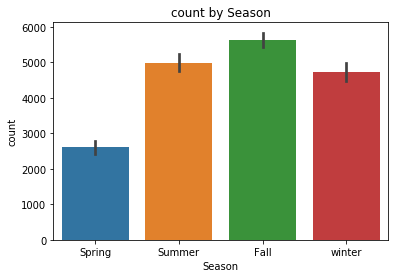

In [12]:
fig, ax = plt.subplots()
sns.barplot(data=dataset[['season','count']],
            x='season',
            y='count',
            ax=ax)

plt.title('count by Season')
plt.ylabel('count')
plt.xlabel('Season')

tick_val=[0, 1, 2, 3]
tick_lab=['Spring','Summer','Fall',"winter"]
plt.xticks(tick_val, tick_lab)

plt.show()

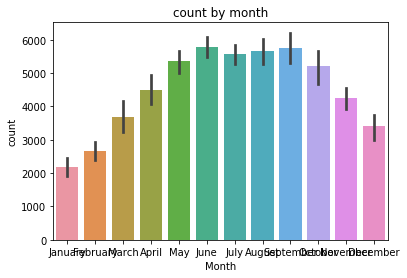

In [13]:
fig, ax = plt.subplots()
sns.barplot(data=dataset[['month','count']], x='month', y='count', ax=ax)

plt.title('count by month')
plt.ylabel('count')
plt.xlabel('Month')

tick_val=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
tick_lab=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(tick_val, tick_lab)

plt.show()

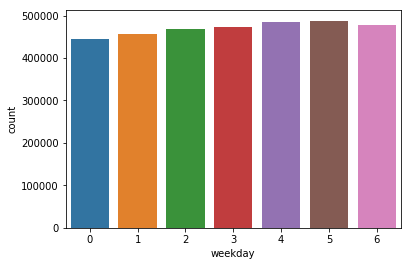

In [14]:
by_week = dataset.groupby(['weekday'])['count'].sum().reset_index()
ax = sns.barplot(x = by_week['weekday'], y = by_week['count'])
ax.set(xlabel='weekday', ylabel='count')
plt.show()

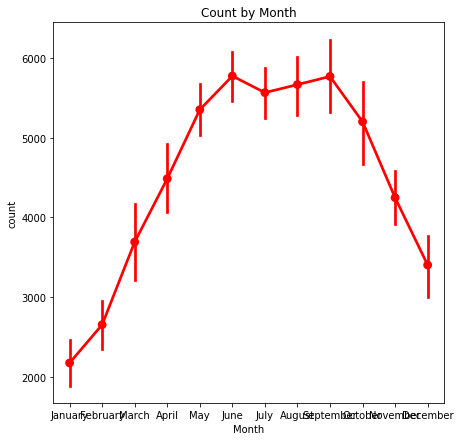

In [15]:
fig, ax = plt.subplots(figsize=(7,7))
sns.pointplot(data=dataset[['month', 'count']],
              x='month',
              y='count',
              ax=ax,
              color='red')

#sns.pointplot(data=dataset[['month', 'casual', 'registered']],
#              x='month',
#              y='registered',
#              ax=ax,
#              color='black')

tick_val=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
tick_lab=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(tick_val, tick_lab)

plt.title('Count by Month')
plt.ylabel('count')
plt.xlabel('Month')

plt.show()

In [16]:
missing_val = pd.DataFrame(dataset.isnull().sum())

In [17]:
missing_val

,0
instant,0
datetime,0
season,0
year,0
month,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


{'whiskers': [<matplotlib.lines.Line2D at 0x187e30072e8>,
 'caps': [<matplotlib.lines.Line2D at 0x187e3007978>,
 'boxes': [<matplotlib.lines.Line2D at 0x187e2ffceb8>],
 'medians': [<matplotlib.lines.Line2D at 0x187e3007da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x187e3012390>],
 'means': []}

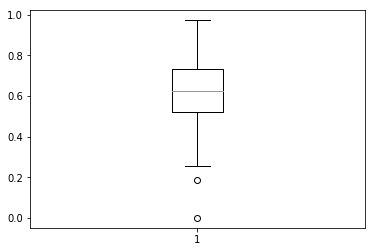

In [18]:
%matplotlib inline  
plt.boxplot(dataset['humidity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x187e305ada0>,
 'caps': [<matplotlib.lines.Line2D at 0x187e3066438>,
 'boxes': [<matplotlib.lines.Line2D at 0x187e305a9e8>],
 'medians': [<matplotlib.lines.Line2D at 0x187e3066ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x187e3066e10>],
 'means': []}

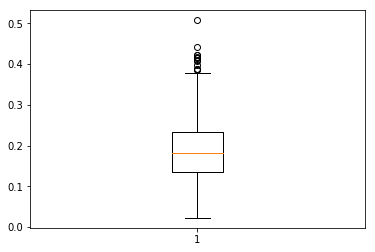

In [19]:
%matplotlib inline  
plt.boxplot(dataset['windspeed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x187e2f1b2e8>,
 'caps': [<matplotlib.lines.Line2D at 0x187e2f1b4e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x187e2f1b748>],
 'medians': [<matplotlib.lines.Line2D at 0x187e2f2a0f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x187e2f2ab00>],
 'means': []}

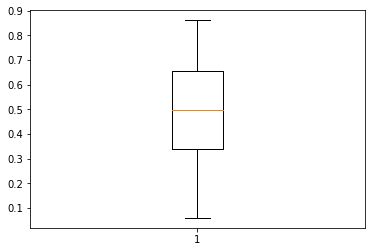

In [20]:
%matplotlib inline  
plt.boxplot(dataset['temp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x187e1ba0cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x187e1afbc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x187e1ba0dd8>],
 'medians': [<matplotlib.lines.Line2D at 0x187e1afbd68>],
 'fliers': [<matplotlib.lines.Line2D at 0x187e1afb1d0>],
 'means': []}

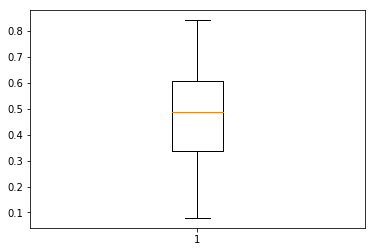

In [21]:
%matplotlib inline  
plt.boxplot(dataset['atemp'])

In [22]:
cnames=['temp','atemp','humidity','windspeed']

In [23]:

q75, q25 = np.percentile(dataset['humidity'], [75 ,25])
iqr = q75 - q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
dataset = dataset.drop(dataset[dataset['humidity'] < min].index)
dataset = dataset.drop(dataset[dataset['humidity'] > max].index)





In [24]:
q75, q25 = np.percentile(dataset['windspeed'], [75 ,25])
iqr = q75 - q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
dataset = dataset.drop(dataset[dataset['windspeed'] < min].index)
dataset = dataset.drop(dataset[dataset['windspeed'] > max].index)

In [25]:
dataset.shape

(717, 16)

In [26]:
df_corr = dataset.loc[:,cnames]

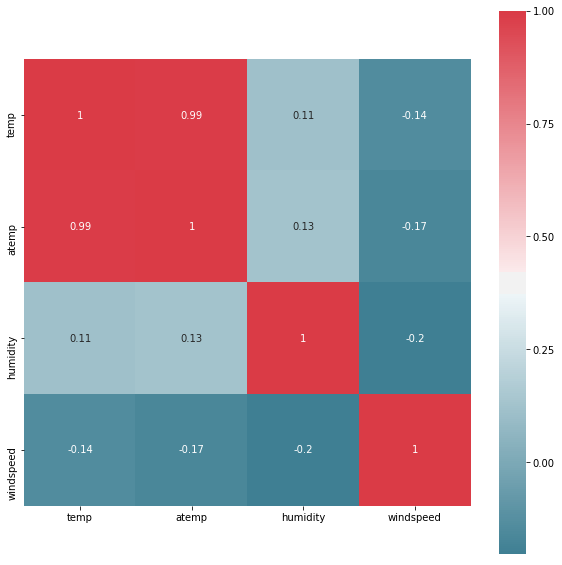

In [27]:
f, ax = plt.subplots(figsize=(10, 10))
corr = df_corr.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [28]:
cat_names=['season','year','month','holiday','weekday','workingday','weathersit']



In [29]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [30]:
anova=ols('count~season+year+month+holiday+weekday+workingday+weathersit',data=dataset).fit()

In [31]:
anova_table=sm.stats.anova_lm(anova,typ=2)

In [32]:
anova_table

,sum_sq,df,F,PR(>F)
season,6.016829e+07,3.0,27.932402,4.657045e-17
year,8.207669e+08,1.0,1143.093310,1.084247e-148
month,1.689411e+08,11.0,21.389688,1.201107e-37
holiday,5.037653e+05,1.0,0.701601,4.025355e-01
weekday,1.627039e+07,6.0,3.776665,1.041289e-03
workingday,1.692268e+07,1.0,23.568442,1.491215e-06
weathersit,1.840712e+08,2.0,128.179217,4.407782e-48
Residual,4.968717e+08,692.0,NaN,NaN


In [33]:

for i in cnames:
   print(i)
   dataset[i] = (dataset[i] - dataset[i].mean())/dataset[i].std()

temp
atemp
humidity
windspeed


In [34]:
dataset = dataset.drop(['instant', 'datetime', 'temp','holiday', 'casual', 'registered','weekday'], axis=1)

In [35]:
dataset

,season,year,month,workingday,weathersit,atemp,humidity,windspeed,count
0,1,0,1,0,2,-0.690307,1.251745,-0.359967,985
1,1,0,1,0,2,-0.750900,0.463466,0.867198,801
2,1,0,1,1,1,-1.758127,-1.395534,0.863994,1349
3,1,0,1,1,1,-1.618891,-0.295407,-0.362057,1562
4,1,0,1,1,1,-1.513789,-1.397803,0.008546,1600
5,1,0,1,1,1,-1.489646,-0.813816,-1.347360,1606
6,1,0,1,1,2,-1.639013,-0.954347,-0.244624,1510
7,1,0,1,0,2,-1.924540,-0.687601,1.121635,959
8,1,0,1,0,1,-2.206965,-1.417843,2.447051,822
9,1,0,1,1,1,-1.994204,-1.067684,0.515150,1321


In [35]:
dataset_logit = pd.DataFrame(dataset['count'])

In [40]:
colnames=['atemp','humidity','windspeed']

In [42]:
dataset_logit = dataset_logit.join(dataset[colnames])

In [44]:
dataset_logit.head()

,count,atemp,humidity,windspeed
0,985,-0.690307,1.251745,-0.359967
1,801,-0.750900,0.463466,0.867198
2,1349,-1.758127,-1.395534,0.863994
3,1562,-1.618891,-0.295407,-0.362057
4,1600,-1.513789,-1.397803,0.008546


In [45]:
cat_names = ["season", "year", "month", "workingday", "weathersit"]

for i in cat_names:
    temp = pd.get_dummies(dataset[i], prefix = i)
    dataset_logit = dataset_logit.join(temp)

In [46]:
dataset_logit

,count,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,year_0,year_1,...,month_8,month_9,month_10,month_11,month_12,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,985,-0.690307,1.251745,-0.359967,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,801,-0.750900,0.463466,0.867198,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,1349,-1.758127,-1.395534,0.863994,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,1562,-1.618891,-0.295407,-0.362057,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,1600,-1.513789,-1.397803,0.008546,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
5,1606,-1.489646,-0.813816,-1.347360,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
6,1510,-1.639013,-0.954347,-0.244624,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7,959,-1.924540,-0.687601,1.121635,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
8,822,-2.206965,-1.417843,2.447051,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
9,1321,-1.994204,-1.067684,0.515150,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0


In [47]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [48]:
dataset_logit

,count,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,year_0,year_1,...,month_8,month_9,month_10,month_11,month_12,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,985,-0.690307,1.251745,-0.359967,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,801,-0.750900,0.463466,0.867198,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,1349,-1.758127,-1.395534,0.863994,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,1562,-1.618891,-0.295407,-0.362057,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,1600,-1.513789,-1.397803,0.008546,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
5,1606,-1.489646,-0.813816,-1.347360,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
6,1510,-1.639013,-0.954347,-0.244624,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7,959,-1.924540,-0.687601,1.121635,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
8,822,-2.206965,-1.417843,2.447051,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
9,1321,-1.994204,-1.067684,0.515150,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0


In [51]:
X = dataset_logit.iloc[:, 1:28]
y = dataset_logit.iloc[:,0]


In [52]:
X

,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,year_0,year_1,month_1,...,month_8,month_9,month_10,month_11,month_12,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,-0.690307,1.251745,-0.359967,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
1,-0.750900,0.463466,0.867198,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
2,-1.758127,-1.395534,0.863994,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,1,0,0
3,-1.618891,-0.295407,-0.362057,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,1,0,0
4,-1.513789,-1.397803,0.008546,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,1,0,0
5,-1.489646,-0.813816,-1.347360,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,1,0,0
6,-1.639013,-0.954347,-0.244624,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7,-1.924540,-0.687601,1.121635,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
8,-2.206965,-1.417843,2.447051,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
9,-1.994204,-1.067684,0.515150,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,1,0,0


In [53]:
y

0       985
1       801
2      1349
3      1562
4      1600
5      1606
6      1510
7       959
8       822
9      1321
10     1263
11     1162
12     1406
13     1421
14     1248
15     1204
16     1000
17      683
18     1650
19     1927
20     1543
21      981
22      986
23     1416
24     1985
25      506
26      431
27     1167
28     1098
29     1096
       ... 
700    5191
701    4649
702    6234
703    6606
704    5729
705    5375
706    5008
707    5582
708    3228
709    5170
710    5501
711    5319
712    5532
713    5611
714    5047
715    3786
716    4585
717    5557
718    5267
719    4128
720    3623
722    1787
723     920
724    1013
725     441
726    2114
727    3095
728    1341
729    1796
730    2729
Name: count, Length: 717, dtype: int64

In [54]:
X.shape


(717, 26)

In [55]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2,random_state = 0)

In [56]:
#Linear regression model
from sklearn.linear_model import LinearRegression
lm_model=LinearRegression().fit(X_train, y_train)
print(lm_model.intercept_)
print(lm_model.coef_)
lm_predict=lm_model.predict(X_test)

3967.8357513404812
[  815.98588936  -267.46132089  -185.5741997   -896.77209498
    92.12324404    59.36007079   745.28878014  -992.55191438
   992.55191438  -260.16601892  -152.8912539    323.23676346
    47.86817353   376.50783046    48.93651558  -335.63388656
    47.10871033   648.60432914   148.0668108   -510.69466939
  -380.94330452   -67.06414303    67.06414303   670.07711372
   350.21505012 -1020.29216383]


In [57]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,lm_predict)))

780.4810880378637


In [58]:
#Ridge regression model
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.01, normalize=True)

ridgeReg.fit(X_train,y_train)
print(ridgeReg.coef_)
pred = ridgeReg.predict(X_test)

[  776.59105439  -256.47020923  -184.78543605  -876.79520509
   104.1372839     63.95733252   709.76385348  -990.67621778
   990.67621778  -331.50778954  -207.91059463   282.11648449
    32.37320551   377.27502425    80.83805258  -282.69731409
    83.57125807   668.45971771   177.21086003  -498.61944362
  -397.38094679   -68.60248292    68.60248292   245.43739765
   -88.11306739 -1466.87507747]


In [59]:
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

777.6199226373483


In [60]:
#Lasso regression model
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.01, normalize=True)

lassoReg.fit(X_train,y_train)

pred = lassoReg.predict(X_test)
print(lassoReg.coef_)

[ 8.16122722e+02 -2.67103079e+02 -1.85286661e+02 -9.92098386e+02
  0.00000000e+00 -3.28721529e+01  6.47318371e+02 -1.98465030e+03
  0.00000000e+00 -3.03371297e+02 -1.96006688e+02  2.77299012e+02
  0.00000000e+00  3.28001092e+02  8.10736181e-01 -3.82251786e+02
 -0.00000000e+00  6.01681880e+02  1.05601917e+02 -5.51347544e+02
 -4.22491840e+02 -1.33671932e+02  1.39105006e-12  3.19739921e+02
 -0.00000000e+00 -1.37030830e+03]


In [61]:
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

780.6343976332059


In [62]:
#K-Fold cross validation
from sklearn.model_selection import cross_val_score
results=cross_val_score(estimator=lassoReg,X=X_train,y=y_train,cv=10,scoring='neg_mean_squared_error')
print(results.mean())

-663351.9946792624


In [63]:
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -663351.995 (224003.515)


In [64]:
from sklearn.model_selection import GridSearchCV
parameters=[{'alpha':[0.0001,0.001,0.01,.05,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]}]
grid_search=GridSearchCV(estimator=lassoReg,param_grid=parameters,cv=10)
grid_search=grid_search.fit(X_train, y_train)
best_parameters=grid_search.best_params_
best_parameters
y_pred=grid_search.predict(X_test)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7170543.774513245, tolerance: 184047.9490446602
  positive)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9981089.952956766, tolerance: 178595.78885048546
  positive)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10671311.097203046, tolerance: 183590.59202248065
  positive)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not conve

In [65]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

790.1554989423684


In [66]:
#Decision tree model
from sklearn.tree import DecisionTreeRegressor
fit_DT = DecisionTreeRegressor(max_depth=10).fit(X_train, y_train)
predictions_DT = fit_DT.predict(X_test)




In [67]:
print(np.sqrt(metrics.mean_squared_error(y_test,predictions_DT)))

816.5429929824193


In [68]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=500).fit(X_train, y_train)
predictions_RF=rf_model.predict(X_test)

In [69]:
print(np.sqrt(metrics.mean_squared_error(y_test,predictions_RF)))

652.1177887260006
